In [69]:
import obspy
import requests
import io
import matplotlib
import pandas as pd
import helpers
import functools
import datetime
import copy

In [70]:
# def get_event_response(network=None, station=None, channel=None,
#                        starttime=None, endtime=None):
    
#     """get an event mseed file from the knmi database given
#     query parameters describing the event"""
    
#     baseurl = 'http://rdsa.knmi.nl/fdsnws/dataselect/1/query'
#     payload = {'starttime':starttime,'endtime':endtime,'network':network,
#                'station':station, 'channel':channel,'nodata':404}
#     r = requests.get(baseurl,params=payload)
#     if r.status_code ==200:
#         return {'data':r.content,'starttime':starttime,'endtime':endtime
#                 ,'channel':channel,'station':station}

def get_event_response(network=None, station=None, channel=None,
					   eventid=None,starttime=None, endtime=None):
    """get an event mseed file from the knmi database given
    query parameters describing the event"""
    baseurl = 'http://rdsa.knmi.nl/fdsnws/dataselect/1/query'
    payload = {'starttime':starttime,'endtime':endtime,'network':network,
               'station':station, 'channel':channel,'nodata':404}
    r = requests.get(baseurl,params=payload)
    if r.status_code ==200:
    	return {'data':r.content,'starttime':starttime,'endtime':endtime
                ,'channel':channel,'station':station, '_id':eventid}
    
def streamify(event_response):
    data = event_response['data']
    st = obspy.read(io.BytesIO(data))
    useful_keys = ['starttime','endtime','channel','station']
    streamified = {'stream':st}
    
    for k in useful_keys:
        streamified[k]=event_response[k]
    return streamified
    

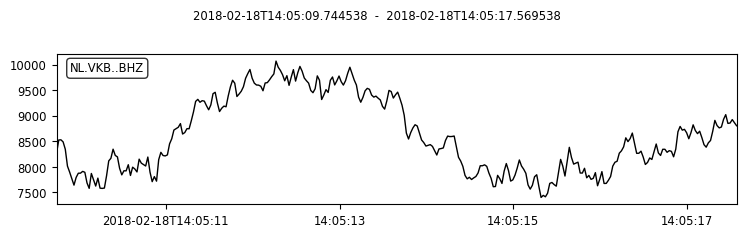

In [71]:
tstart='2018-02-18T14:05:10.2'
tend = '2018-02-18T14:05:15.2'
network = 'NL'
station= 'VKB'
channel = 'BHZ'

event_response = get_event_response(network=network,station=station,
                                    channel=channel,starttime=tstart,
                                    endtime=tend,eventid='asd')
event_stream = streamify(event_response)
trace_in = event_stream['stream'][0]

trace_in.plot()

In [72]:
print(event_stream)
print(event_stream['stream'][0])
print(type(event_stream['stream'][0]))


{'stream': <obspy.core.stream.Stream object at 0x1c1e375278>, 'starttime': '2018-02-18T14:05:10.2', 'endtime': '2018-02-18T14:05:15.2', 'channel': 'BHZ', 'station': 'VKB'}
NL.VKB..BHZ | 2018-02-18T14:05:09.744538Z - 2018-02-18T14:05:17.569538Z | 40.0 Hz, 314 samples
<class 'obspy.core.trace.Trace'>


In [73]:

def stream_formatter(stream_in,my_start_time,my_dur):
    
    my_start_time=obspy.core.utcdatetime.UTCDateTime(my_start_time)

    trace_in = stream_in['stream'][0]
    channel_in = stream_in['channel']
    station_in = stream_in['station']
    
    my_end_time = my_start_time + my_dur
    trace_in.trim(my_start_time,my_end_time)
    
    stream_in['stream'][0]=trace_in
    
    stream_in['starttime']=str(obspy.core.utcdatetime.UTCDateTime(trace_in.stats.starttime))
    stream_in['endtime']=str(obspy.core.utcdatetime.UTCDateTime(trace_in.stats.endtime))
       
    return stream_in 
    
    
    
    

In [74]:
my_start_time = "2018-02-18T14:05:10.21"
my_dur = 3.0

print('initial stream\n')
print(event_stream)
print('\n')
formatted_stream = stream_formatter(event_stream,my_start_time,my_dur)
print(formatted_stream)
print('\n')

initial stream

{'stream': <obspy.core.stream.Stream object at 0x1c1e375278>, 'starttime': '2018-02-18T14:05:10.2', 'endtime': '2018-02-18T14:05:15.2', 'channel': 'BHZ', 'station': 'VKB'}


{'stream': <obspy.core.stream.Stream object at 0x1c1e375278>, 'starttime': '2018-02-18T14:05:10.219538Z', 'endtime': '2018-02-18T14:05:13.219538Z', 'channel': 'BHZ', 'station': 'VKB'}




In [ ]:
print(formatted_stream)
print('\n')
print(event_stream)

In [ ]:
dictionary['key3']='yarrak rasit'

In [ ]:
print(dictionary)